In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_dict={}
#Dictionary to store values with each coutry key

In [10]:
df=pd.read_csv("all_data.csv")
df.rename(columns={
    "Life expectancy at birth (years)":"Life_Expectancy"
},inplace=True)
print(df.info())
#NO null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life_Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [41]:
for item in df.Country.unique():
    data=df[df.Country==item]
    data_dict[item]=data

In [42]:
class Coutry_GDP_LifeExpectancy:
    data_dict={}
    df=pd.read_csv("all_data.csv")
    df.rename(columns={
    "Life expectancy at birth (years)":"Life_Expectancy"},inplace=True)
    def __init__(self):
        for item in df.Country.unique():
            data=data_dict[df.Country=="item"]
            data_dict["item"]=data
        self.data_dict=data_dict
        self.df=df
    
    def GDP_ALL(self):
        sns.lineplot(data=self.df, x="Year",y="Life_Expectancy",hue="Country")
        plt.show()
        plt.clf()
    def LifeExpectancy_all(self):
        sns.lineplot(data=self.df, x='Year', y='GDP', hue='Country')
    


{'Chile':    Country  Year  Life_Expectancy           GDP
 0    Chile  2000             77.3  7.786093e+10
 1    Chile  2001             77.3  7.097992e+10
 2    Chile  2002             77.8  6.973681e+10
 3    Chile  2003             77.9  7.564346e+10
 4    Chile  2004             78.0  9.921039e+10
 5    Chile  2005             78.4  1.229650e+11
 6    Chile  2006             78.9  1.547880e+11
 7    Chile  2007             78.9  1.736060e+11
 8    Chile  2008             79.6  1.796380e+11
 9    Chile  2009             79.3  1.723890e+11
 10   Chile  2010             79.1  2.185380e+11
 11   Chile  2011             79.8  2.522520e+11
 12   Chile  2012             79.9  2.671220e+11
 13   Chile  2013             80.1  2.783840e+11
 14   Chile  2014             80.3  2.609900e+11
 15   Chile  2015             80.5  2.425180e+11,
 'China':    Country  Year  Life_Expectancy           GDP
 16   China  2000             71.7  1.211350e+12
 17   China  2001             72.2  1.339400e+12
 

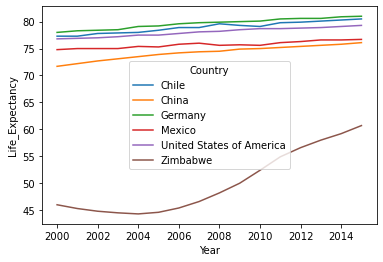

In [28]:
sns.lineplot(data=df, x="Year",y="Life_Expectancy",hue="Country", markers=True)
plt.show()

In [82]:

count=1
for key, value in data_dict.items():
    plt.hist(data=value, x="Year",y="Life_Expectancy",label=key,color="Blue",normed=True)
    plt.hist(data=value, x="Year",y="GDP",label=key,color="Red", normed=True)
    plt.show()
    plt.clf()
    count+=1

AttributeError: 'Rectangle' object has no property 'normed'

ConversionError: Failed to convert value(s) to axis units: 'Life_Expectancy'

<Figure size 432x288 with 1 Axes>